In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm,datasets

In [4]:
plt.style.use('seaborn')

In [10]:
iris = datasets.load_iris()

In [7]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
from sklearn.model_selection import train_test_split

In [16]:
X = iris.data[:,:2]
y = iris.target

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [18]:
svm_model = svm.SVC(kernel='rbf',C=1,gamma='auto')

In [19]:
svm_model.fit(x_train,y_train)

SVC(C=1, gamma='auto')

In [21]:
svm_score = svm_model.score(x_test,y_test)
svm_score

0.7777777777777778

<ipython-input-37-594215e360d3>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,1,1)


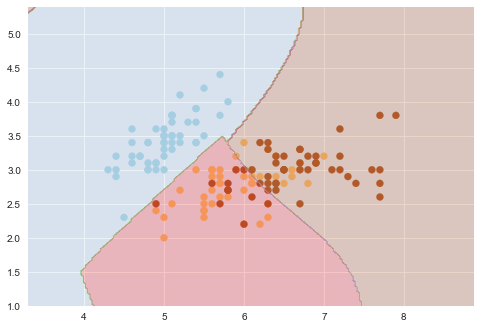

In [37]:
x_min,x_max = X[:,0].min()-1,X[:,0].max()+1
y_min,y_max = X[:,1].min()-1,X[:,1].max()+1
h = (x_max/x_min)/100
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)

plt.subplot(1,1,1)
Z= svm_model.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,cmap =plt.cm.Paired,alpha=0.25)

plt.show()

In [29]:
import pickle

In [30]:
pkl_filename = "svm_model.pkl"

In [34]:
with open(pkl_filename,'wb') as file :
    pickle.dump(svm_model,file)

In [35]:
with open(pkl_filename,'rb') as file :
    svm_model = pickle.load(file)
    

In [36]:
svm_model.score(x_test,y_test)

0.7777777777777778